In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from definitions import ROOT_DIR
from csv import reader as csv_reader

Distribution of outdegree

In [16]:
G = ox.graph_from_xml('./data/Porto_driving.osm')
ref_G = ox.graph_from_place('Distrito do Porto, PT', clean_periphery=False,network_type='drive')


In [5]:
G.nodes[25503936]

{'y': 41.1660713, 'x': -8.6406364, 'highway': 'nan'}

In [30]:
G.number_of_nodes()

5229

In [31]:
G.number_of_edges()

18716

Text(0.5, 1.0, 'Distribution of out degree')

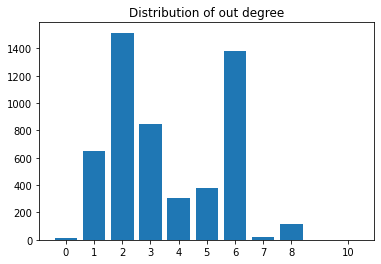

In [27]:
out_degrees = np.asarray(list(map(lambda x: len(G.out_edges(x)), G.nodes)))

unique, counts = np.unique(out_degrees, return_counts=True)

plt.bar(unique, counts)
plt.xticks(unique)
plt.title('Distribution of out degree')

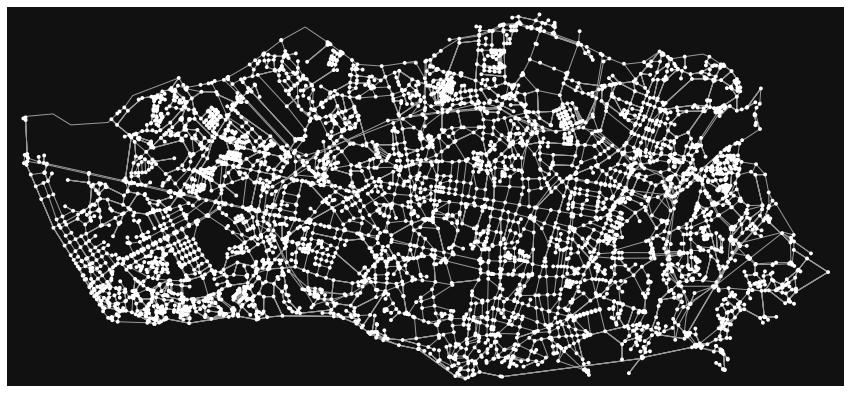

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [17]:
ox.plot.plot_graph(G, figsize=(15,15))

In [9]:
max(list(map(lambda x: len(G.in_edges(x)), G.nodes)))


10

In [22]:
len(G.nodes)

5229

In [29]:
sum(list(map(lambda x: int(len(G.in_edges(x)) == 1), G.nodes))), list(G.edges)[2]


(640, (25503951, 1243857957, 0))

Fraction of trips with finished true in the middle

In [12]:
from definitions import ROOT_DIR
from csv import reader as csv_reader

processed_trip_path = f"{ROOT_DIR}/processed_trips.csv"
with open(processed_trip_path, 'r') as f:
    reader = csv_reader(f)
    cnt_trips = 0
    trip_id = 0
    all_trips = []
    check = False
    for i,row in enumerate(reader):
        # if check:
        #     cnt_trips+= trip_id == row[4]
        #     check = False

        if row[2][0] == 'T':
            trip_id = row[4]
            if not len(all_trips):
                check = True
                all_trips.append(trip_id)
            else:
                if all_trips[-1] != trip_id:
                    check = True
                    all_trips.append(trip_id)
                else:
                    if check:
                        cnt_trips+=1
                        check = False



print(cnt_trips, len(all_trips))




418231 1466191


In [13]:
cnt_trips/len(all_trips)

0.2852500117651793

In [43]:
len(all_trips) - cnt_trips

1047960

Number of trips that finish in the final target

In [22]:
def unfinished_trips(processed_trip_path):
    with open(processed_trip_path, 'r') as f:
        reader = csv_reader(f)
        cnt_all_trips = 1
        prev_id = 0
        prev_finish = 'T'
        not_finished_trips = []

        check = False
        for i,row in enumerate(reader):
            if i>0:
                trip_id = float(row[4])
                if prev_id != trip_id:
                    cnt_all_trips+=1
                    prev_id = trip_id
                    if prev_finish!= 'T':
                        not_finished_trips.append(trip_id)

                prev_finish = row[2][0]
           
        
        return not_finished_trips


            


In [23]:
unfinished_trips(old_trips)

[]

ALL TRIPS FINISH

In [48]:
len(all_trips), cnt_all_trips

(1466191, 1466193)

In [87]:
1047960 - 1218

1046742

Distribution of lengths

Text(0.5, 1.0, 'Lengths')

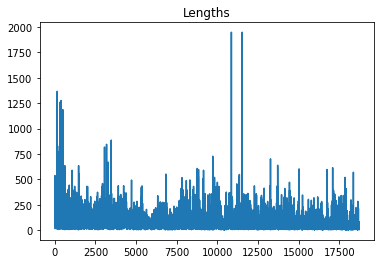

In [20]:

lengths = np.asarray(list(map(lambda a: G.get_edge_data(a[0],a[1])[0]['length'], G.edges)))



plt.plot(lengths)
plt.title('Lengths')

Helper graph preprocessin functions

In [11]:
def remove_dead_ends(self, graph):
    done = False
    while not done: 
        dead_ends = [] 
        for id in graph.nodes:
            # find sink nodes 
            if graph.out_degree(id) == 0:
                dead_ends.append(id)
                # remove parent of sink that will also become sink
                for pred in graph.predecessors(id):
                    if graph.out_degree(pred) == 1:
                        dead_ends.append(pred)
        if not len(dead_ends):
            done = True
        for id in dead_ends:
            graph.remove_node(id)


0


In [31]:
def trips_with_missing_nodes_from_orig_graph(processed_trip_path,graph):
    # initialize trip id lists
    
    trips_missing_nodes = []
    with open(processed_trip_path, 'r') as f:
        reader = csv_reader(f)
        k = 0
        for i,row in enumerate(reader):
            if i > 0:
                trip_id = float(row[4])
                u = int(row[0])
                v = int(row[1])
                
                try:                
                    graph.nodes[u]
                    graph.nodes[v]
                except KeyError:
                    if not len(trips_missing_nodes) or trips_missing_nodes[-1]!= trip_id:
                        trips_missing_nodes.append(trip_id)

    return trips_missing_nodes 

In [65]:
from definitions import ROOT_DIR
processed_trip_path = f"{ROOT_DIR}/processed_trips.csv"

add_trip_ids_to_nodes(processed_trip_path,G)

# print(len(trips_mutli_finish(processed_trip_path)))

1072238 66428342


In [2]:
from data.preprocess_data import corrupted_trips
from data.data_utils import *
from definitions import ROOT_DIR

graph_path = './data/Porto_driving.osm'
old_trips = f"{ROOT_DIR}/processed_trips.csv"
# new_trips = './data/clear_trips.csv'

corr_trips = corrupted_trips(old_trips, graph_path)
print(len(corr_trips), 418231+9968)
# write_valid_trips(new_trips, old_trips, graph_path)

/home/estraitouri/human-machine-switching/lib/python3.7/site-packages/osmnx/graph.py:478: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


418231 9968
428199
422873 428199


In [22]:
418231+9968

428199

In [ ]:
trips_with_missing_nodes(old_trips, )

In [5]:
from data.preprocess_data import corrupted_trips
new_trips = './data/no_mfin_no_mis_nodes.csv'
ref_G = ox.graph_from_place('Distrito do Porto, PT', clean_periphery=False,network_type='drive')

/Users/mbk-21-0452/human-machine-switching/lib/python3.9/site-packages/osmnx/graph.py:478: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


In [6]:
must_be_empty = corrupted_trips(new_trips, G, ref_G)
print(len(must_be_empty))

0


In [5]:
from data.data_utils import trips_with_missing_nodes
# print(trips_with_missing_nodes(new_trips,G, ref_G))

In [6]:
trips_missing,_= trips_with_missing_nodes('./processed_trips.csv',G, ref_G)

# print(26 in trips_missing)



In [13]:
_

[1353862705, 5149916337, 111508028, 560405663]

In [7]:
for t in trips_missing:
    if t == 26:
        print('found')
        

found


In [27]:
def all_ids(processed_trip_path):
    with open(processed_trip_path, 'r') as f:
        ids =[]
        reader = csv_reader(f)
        for i,row in enumerate(reader):
            # if finished
            if row[2] == 'True':
                trip_id = float(row[4])
                ids.append(trip_id)
                
        
    print(len(set(ids)))
    return set(ids)

In [3]:
trips_no_mfinish_no_missing_nodes = './data/no_mfin_no_mis_nodes.csv'
old_trips = './processed_trips.csv'
final_trips_path='data/cleaned_up_trips.csv'
graph_path = 'data/Porto_driving.osm'

In [79]:
%load_ext autoreload
%autoreload 2
from data.data_utils import * 
graph_with_no_missing_nodes, has_dead_ends = graph_from_trips(trips_no_mfinish_no_missing_nodes,G, ref_G)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ok
0


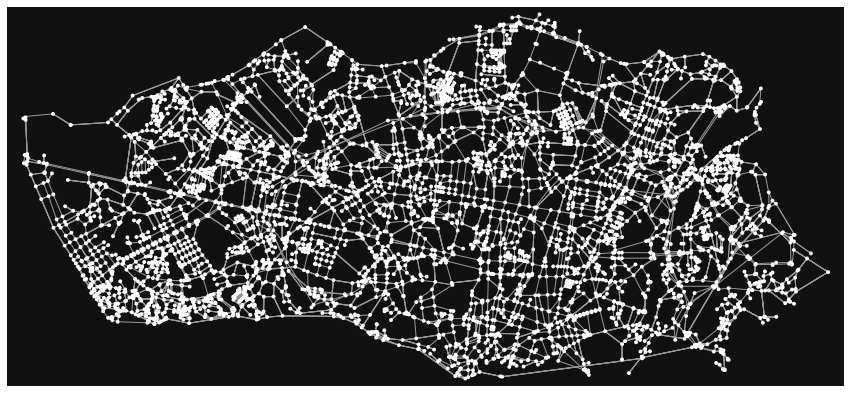

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [22]:
ox.plot.plot_graph(graph_with_no_missing_nodes, figsize=(15,15))


In [25]:
graph_with_no_missing_nodes.number_of_nodes(), G.number_of_nodes()

(5139, 5229)

In [27]:
graph_with_no_missing_nodes.number_of_edges(), G.number_of_edges()

(18606, 18716)

In [70]:
has_dead_ends

False

In [71]:
tds = trips_with_dead_ends(graph_with_no_missing_nodes)

In [81]:
len(tds)

64038

In [82]:
def save_osm_graph(graph, file):
    utn = ox.settings.useful_tags_node
    oxna = ox.settings.osm_xml_node_attrs
    oxnt = ox.settings.osm_xml_node_tags
    utw = ox.settings.useful_tags_way
    oxwa = ox.settings.osm_xml_way_attrs
    oxwt = ox.settings.osm_xml_way_tags
    utn = list(set(utn + oxna + oxnt))
    utw = list(set(utw + oxwa + oxwt))
    ox.config(all_oneway=True, useful_tags_node=utn)

    ox.save_graph_xml(graph, filepath=file)

In [83]:
save_osm_graph(graph_with_no_missing_nodes,'./data/final_graph.osm')

In [84]:
fg = ox.graph_from_xml('./data/final_graph.osm', simplify=False)


In [90]:
nodes_not_in_G = 0
nodes_in_G_wo_trips = 0
for n in graph_with_no_missing_nodes.nodes():
    try:
        graph_with_no_missing_nodes[n]['trips']
    except KeyError:
        try:
            G.nodes[n]
        except KeyError:
            nodes_not_in_G+=1

print(nodes_not_in_G)


KeyError: 2409187407